# 教師なし学習
アルゴリズムには入力データだけ与えられ、データから知識を抽出する。
- 教師なし変換
元のデータ表現を変換して、人間や他の機械学習アルゴリズムにとってわかりやすいデータ表現にする。
    - 次元削除
本質的な特徴を抽出する
    - 成分を見つける
-  クラスタリング
グループ分けするアルゴリズム
例.SNSにあげた写真を人物ごとにグループ分けする

## 前処理とスケール変換
ニューラルネットワークやSVMなどのアルゴリズムはデータのスケール変換に敏感

StandardScaler:標準正規分布に従うよう変換

RobustScaler:四分位数を用いて外れ値を無視する

MinMaxScaler：データが0~1に入るように変換,minで引いてrangeで割る

Normalizer:ユークリッド長1に入るように変換（半径1の円）

In [1]:
from preamble import *
plt.rcParams['image.cmap'] = 'gray'

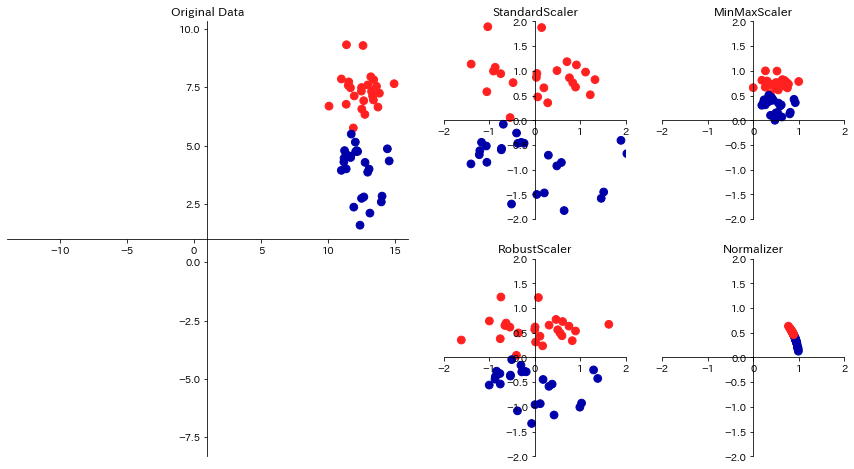

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)

(426, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [5]:
scaler.fit(X_train)

MinMaxScaler()

In [6]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
[  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)

In [8]:
print(X_test_scaled.min(axis=0))
print(X_test_scaled.min(axis=0))


[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

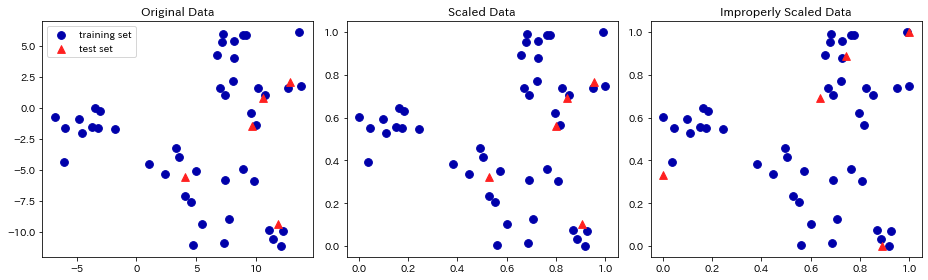

In [9]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
X_train,X_test = train_test_split(X,random_state=5,test_size=.1)
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker="^",c=mglearn.cm2(1),label="test set",s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
fig.tight_layout()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)


In [11]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)


0.9440559440559441

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
svm.score(X_test_scaled,y_test)


0.965034965034965

In [13]:
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
svm.score(X_test_scaled,y_test)

0.958041958041958

# 主成分分析（PCA）
データセットの特徴量を相互に統計的に関連しないように回転する。
回転させた後、重要な特徴量を抜き出す
人の顔を認識するモデルがある時PCAを使って制度を上がられるのか
少し上がるが（5%ほど）、クラス分離は難しい。


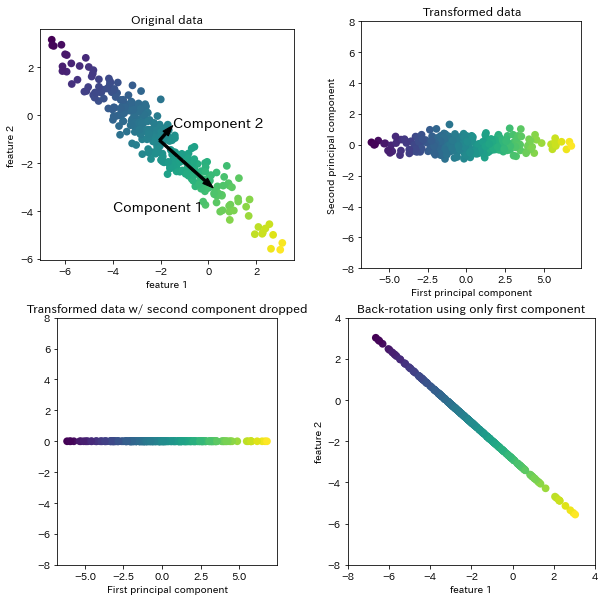

In [14]:
mglearn.plots.plot_pca_illustration()

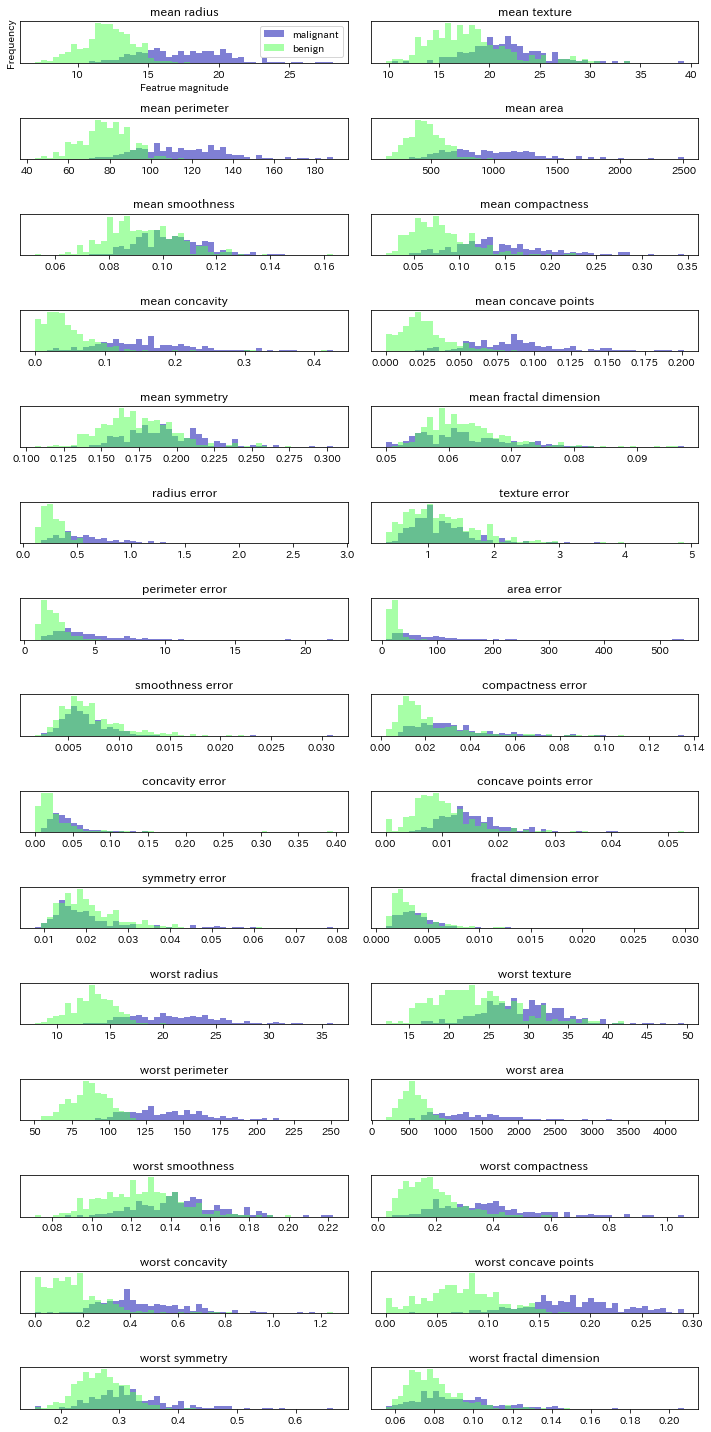

In [15]:
fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Featrue magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [17]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)



In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


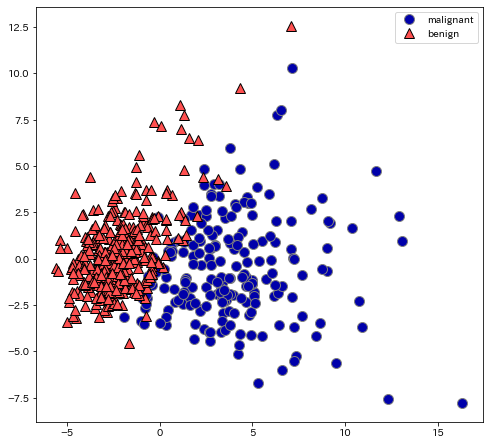

In [19]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")

In [20]:
pca.components_.shape

(2, 30)

In [21]:
pca.components_

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

In [22]:
cancer.data.shape

(569, 30)

In [23]:
X_pca.shape

(569, 2)

Text(0, 0.5, 'Principal components')

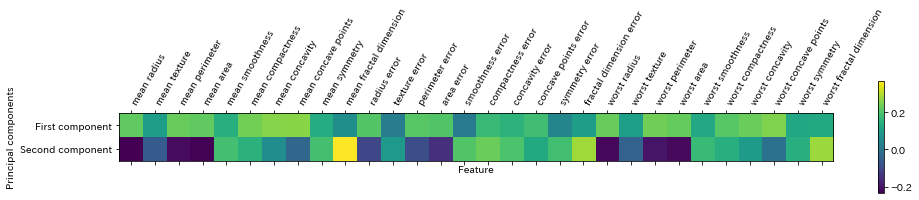

In [24]:
plt.matshow(pca.components_,cmap="viridis")
plt.yticks([0,1],["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [25]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
# fig,axes = plt.subplots(2,5,figsize=(15,8),
#                        subplot_kw={'xticks':(),'yticks':()})
# for target,image,ax in zip(people.target,people.images,axes.ravel()):
#     ax.imshow(image)
#     ax.set_title(people.target_names[target])

In [26]:
print(people.images.shape)
print(people.target_names)

(3023, 87, 65)
['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger 

In [27]:
counts = np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print(name,count,end=' ')
    if (i+1)%3==0:
        print()

Alejandro Toledo 39 Alvaro Uribe 35 Amelie Mauresmo 21 
Andre Agassi 36 Angelina Jolie 20 Ariel Sharon 77 
Arnold Schwarzenegger 42 Atal Bihari Vajpayee 24 Bill Clinton 29 
Carlos Menem 21 Colin Powell 236 David Beckham 31 
Donald Rumsfeld 121 George Robertson 22 George W Bush 530 
Gerhard Schroeder 109 Gloria Macapagal Arroyo 44 Gray Davis 26 
Guillermo Coria 30 Hamid Karzai 22 Hans Blix 39 
Hugo Chavez 71 Igor Ivanov 20 Jack Straw 28 
Jacques Chirac 52 Jean Chretien 55 Jennifer Aniston 21 
Jennifer Capriati 42 Jennifer Lopez 21 Jeremy Greenstock 24 
Jiang Zemin 20 John Ashcroft 53 John Negroponte 31 
Jose Maria Aznar 23 Juan Carlos Ferrero 28 Junichiro Koizumi 60 
Kofi Annan 32 Laura Bush 41 Lindsay Davenport 22 
Lleyton Hewitt 41 Luiz Inacio Lula da Silva 48 Mahmoud Abbas 29 
Megawati Sukarnoputri 33 Michael Bloomberg 20 Naomi Watts 22 
Nestor Kirchner 37 Paul Bremer 20 Pete Sampras 22 
Recep Tayyip Erdogan 30 Ricardo Lagos 27 Roh Moo-hyun 32 
Rudolph Giuliani 26 Saddam Hussein 23 S

In [28]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [29]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(
X_people,y_people,stratify=y_people,random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)



0.23255813953488372

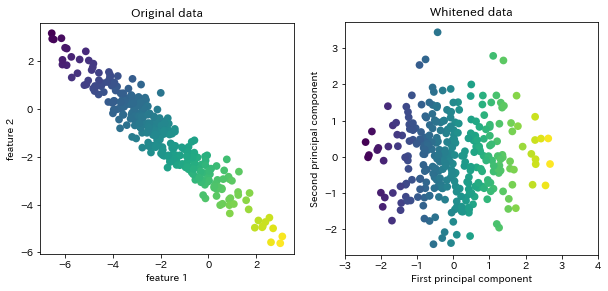

In [30]:
mglearn.plots.plot_pca_whitening()

In [31]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(1547, 100)

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print(knn.score(X_test_pca,y_test))

0.312015503875969


In [33]:
pca.components_.shape

(100, 5655)

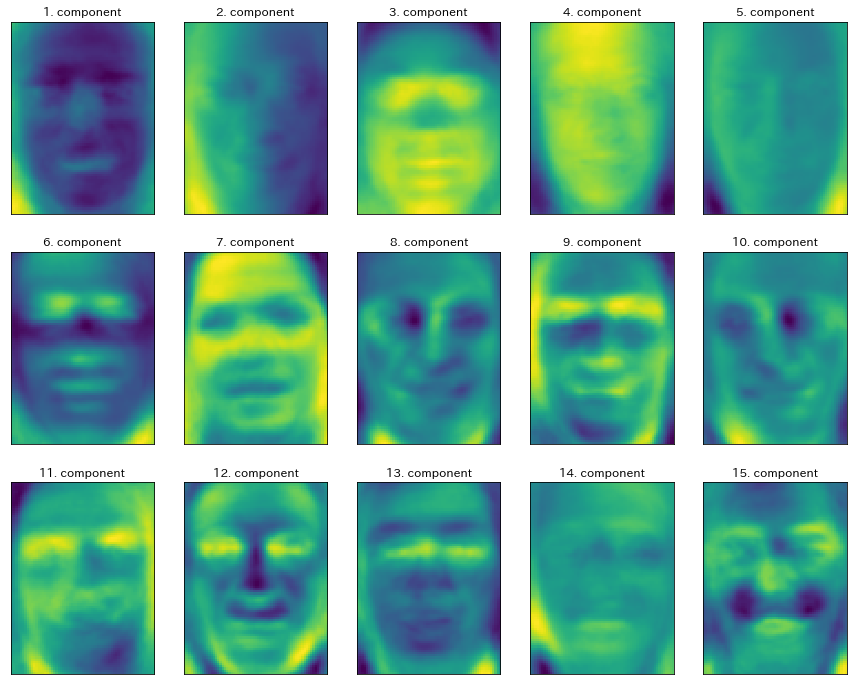

In [34]:
fix,axes = plt.subplots(3,5,figsize=(15,12),
                       subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),
             cmap='viridis')
    ax.set_title("{}. component".format(i+1))

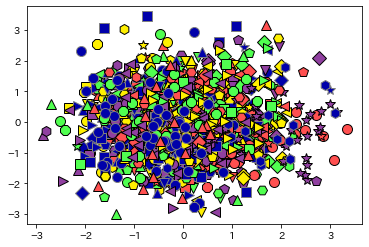

In [35]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)


# 非負値行列因子分解
有用な特徴量を抽出することを目的とする教師なし学習
非負の成分を持つデータにしか使えない
データの極端な部分の方向を向く。
一つしか成分を使わない時は平均を向く
成分の数が変わると、全く別の成分集合が構成される

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  w

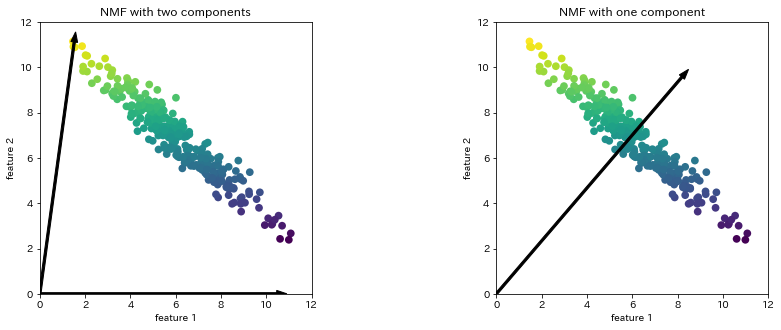

In [36]:
mglearn.plots.plot_nmf_illustration()

In [37]:
# mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


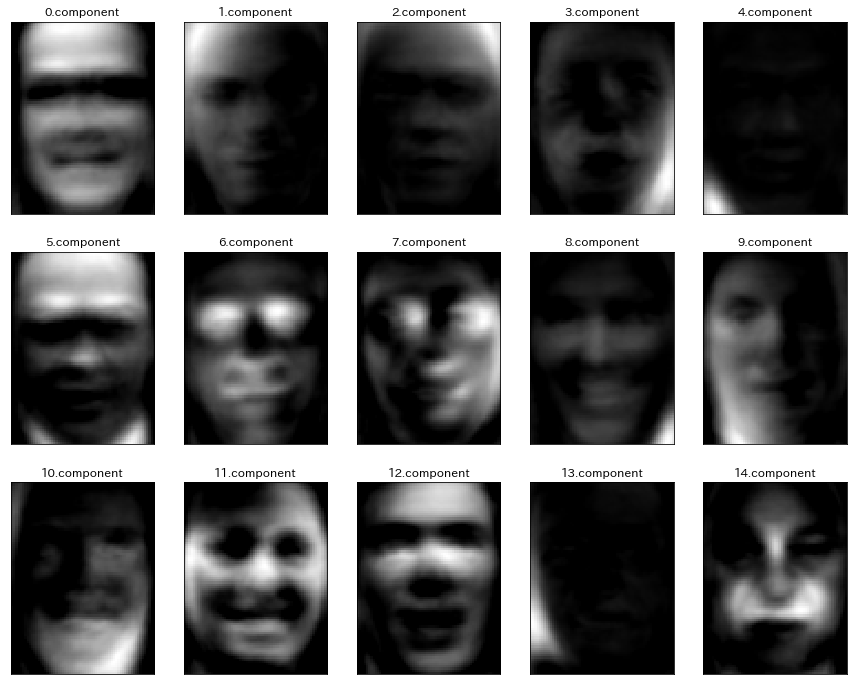

In [38]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))
    

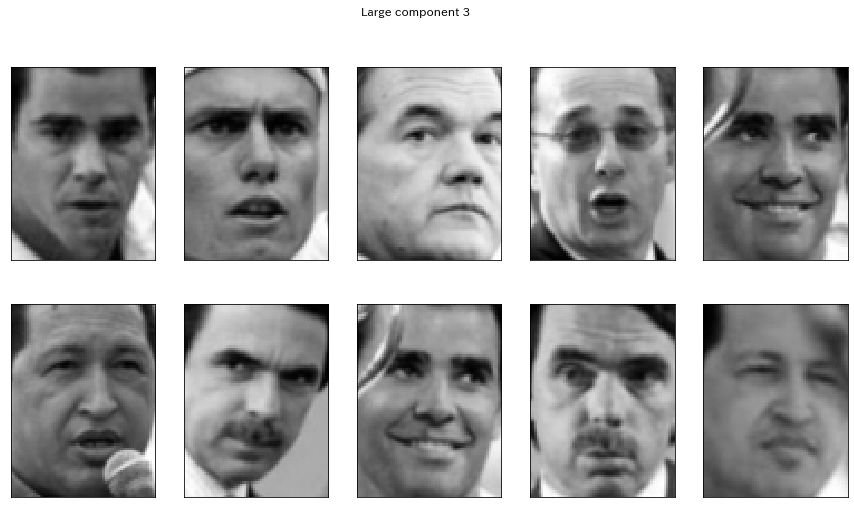

In [39]:
compn = 3
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),
                       subplot_kw={'xticks':(),'yticks':()})

fig.suptitle("Large component 3")
for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

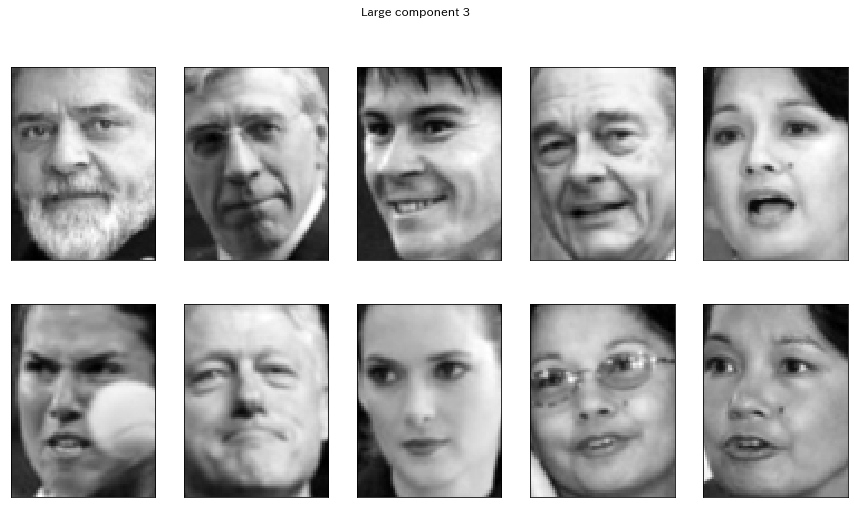

In [40]:
compn = 7
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),
                       subplot_kw={'xticks':(),'yticks':()})

fig.suptitle("Large component 3")
for i, (ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

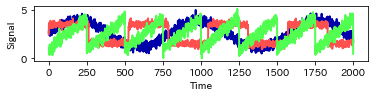

In [41]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [42]:
A = np.random.RandomState(0).uniform(size=(100,3))
np.dot(S,A.T)
print(A.T.shape)
print(X.shape)

(3, 100)
(50, 2)


In [43]:
nmf = NMF(n_components=3,random_state=42)
S_ = nmf.fit_transform(X)
print(S_.shape)

ValueError: Negative values in data passed to NMF (input X)

In [ ]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)


In [ ]:
models = [X,S,S_,H]
names = ['Observations (first)','source', 'NMF recovered' ,'PCA recovered']
fig,axes =  plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})
for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
fig,axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

In [ ]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,0].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(digits[:,0].min(),digits[:,0].max()+1)
plt.xlim(digits[:,1].min(),digits[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits[i,0],digits[i,1],str(digits.target[i],
                                        color=colors[digits.target[i]]
                                        fontdict={'weight':'bold','size':9})
    )
    plt.xlabel("t-sne feature 0")
    plt.xlabel("t-sne feature 1")

# k-means クラスタリング
1. データポイントを最寄のクラスタ重心に割り当てる。
2.次に、個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する
データ

In [ ]:
from preamble import *

In [2]:
mglearn.plots.plot_kmeans_boundaries()

NameError: name 'mglearn' is not defined

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [5]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [6]:
import mglearn

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

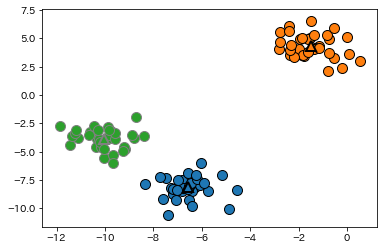

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
        kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],
        markers='^',markeredgewidth=2
)
kmeans.cluster_centers_

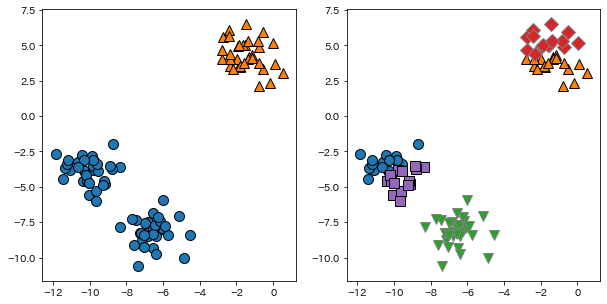

In [8]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

Text(0, 0.5, 'Feature 1')

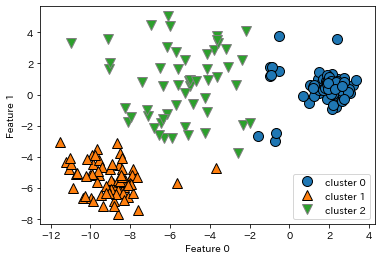

In [9]:
X_varied,y_varied = make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],
                              random_state=170)
y_pred = KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

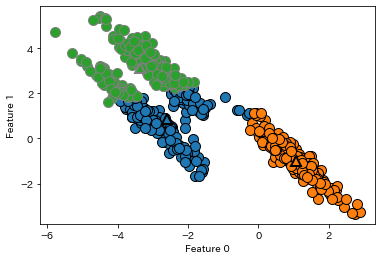

In [10]:
import numpy as np
from sklearn.cluster import KMeans 
X,y = make_blobs(random_state=170,n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X,transformation)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

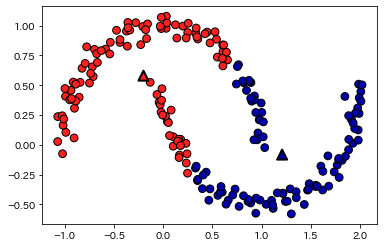

In [11]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2,
           edgecolor='k')

In [12]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# X_train,X_test,y_train,y_test = train_test_split(
# X_people,y_peopel)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
X_train,X_test,y_train,y_test = train_test_split(
X_people,y_people,stratify=y_people,random_state=0)
nmf = NMF(n_components=100,random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100,random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'nmf')

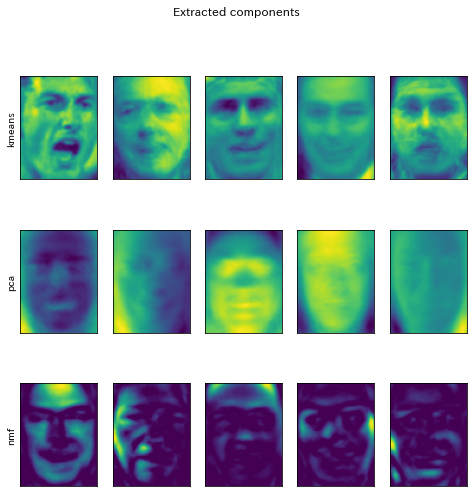

In [14]:
image_shape = people.images[0].shape
fig,axes = plt.subplots(3,5,figsize=(8,8),
                       subplot_kw={'xticks':(),'yticks':()})
fig.suptitle('Extracted components')
for ax, comp_kmeans,comp_pca,comp_nmf in zip(axes.T,kmeans.cluster_centers_,pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape),cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')


    

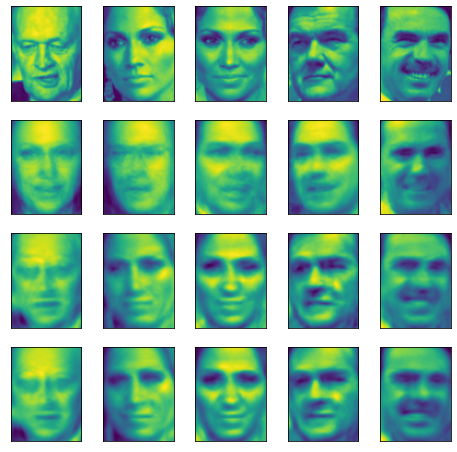

In [15]:
fig,axes = plt.subplots(4,5,figsize=(8,8), 
                       subplot_kw={'xticks':(),'yticks':()})
for ax, orig,rec_kmeans,rec_pca,rec_nmf in zip(
axes.T,X_test,X_reconstructed_kmeans,X_reconstructed_pca,X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

    

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


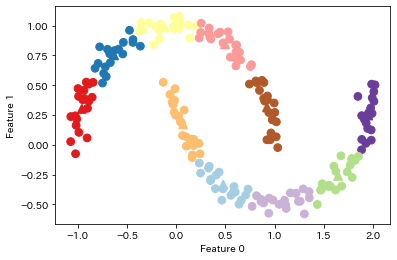

In [16]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [17]:
distance_features = kmeans.transform(X)
distance_features

array([[0.9220768 , 1.46553151, 1.13956805, ..., 1.16559918, 1.03852189,
        0.23340263],
       [1.14159679, 2.51721597, 0.1199124 , ..., 0.70700803, 2.20414144,
        0.98271691],
       [0.78786246, 0.77354687, 1.74914157, ..., 1.97061341, 0.71561277,
        0.94399739],
       ...,
       [0.44639122, 1.10631579, 1.48991975, ..., 1.79125448, 1.03195812,
        0.81205971],
       [1.38951924, 0.79790385, 1.98056306, ..., 1.97788956, 0.23892095,
        1.05774337],
       [1.14920754, 2.4536383 , 0.04506731, ..., 0.57163262, 2.11331394,
        0.88166689]])

## 凝集型クラスタリング
ある原則に基づく一連のクラスタリングアルゴリズム
個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合していく
*指定したクラスタの数
クラスタを併合する連結度。sklearnでは
ward:併合したクラスタ内の分散の増分が最小
average:ポイント間の距離の平均値が最小のクラスタを併合
complete:クラスタ間の距離の最大値が最小となるように併合

凝集型クラスタリングは階層的にクラスタが割り当てられる
２次元だと図示できるが、特徴が多くなると難しい＝＞デンドログラムを使う

## DBSCAN
density-based spatial clusteing of applications with noise 密度に基づくノイズアリ空間クラスタリング
- クラスタ数を先に与える必要がない
- どのクラスタにも属さない点を見つけることができる
- 遅いが大きなデータセットにも適用できる
コアサンプル:高密度領域の中にあるデータポイント
eps:距離
min_samples:クラスタを構成する（eps以内にある）最小のデータ数
適当に一つのデータポイントを選ぶ。そのデータポイントからeps以内にある全てのデータポイントを見つける。
その数がmin_samples以下であればnoiseとなる
min_samples以上のデータポイントがあれば、その点はコアサンプルとなり、クラスラベルが割り当てられる。eps以内にある全ての近傍点をテストする。既に近傍点がコアサンプルであれば、その近傍点をさらにテストする。
クラスタは、クラスタからeps以内にコアサンプルが存在しなくなるまで成長する。





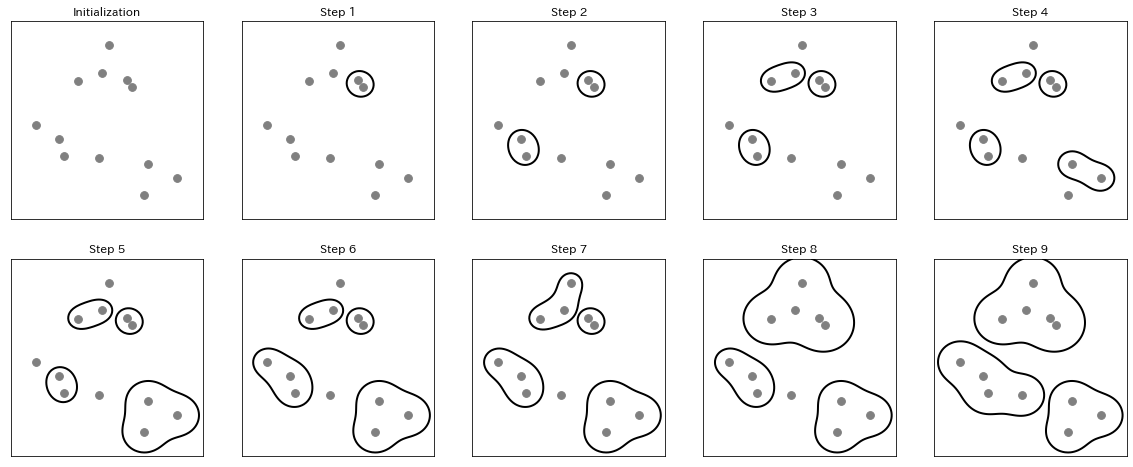

In [19]:
mglearn.plots.plot_agglomerative_algorithm()

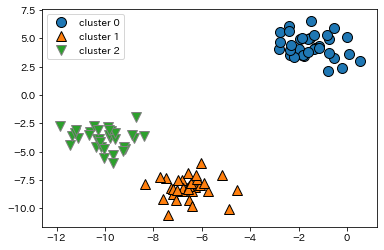

In [24]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(["cluster 0", "cluster 1", "cluster 2"])

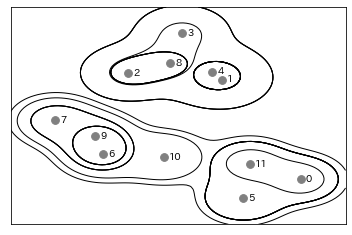

In [25]:
mglearn.plots.plot_agglomerative()

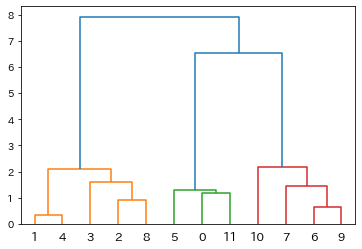

In [26]:
from scipy.cluster.hierarchy import dendrogram,ward
X,y = make_blobs(random_state=0,n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()


In [29]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0,n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


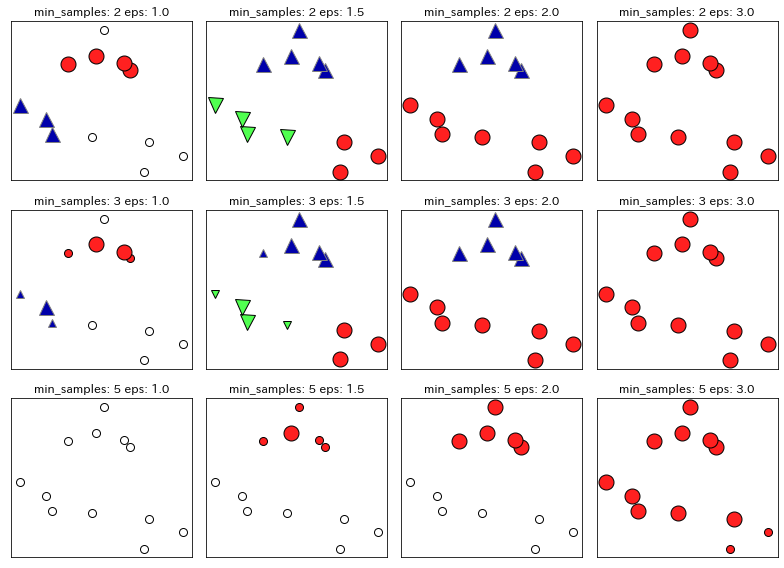

In [30]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'feature 1')

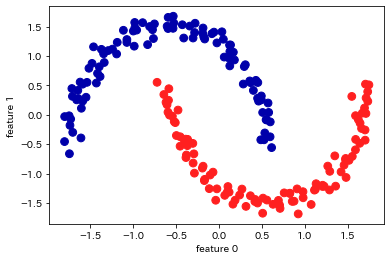

In [41]:
from sklearn.preprocessing import StandardScaler
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

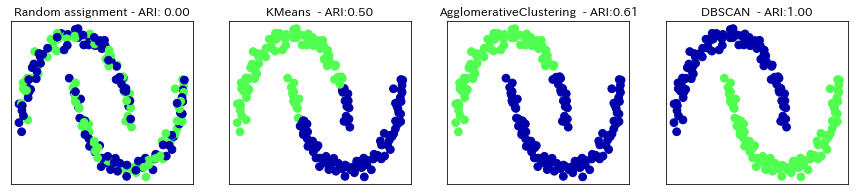

In [47]:
from sklearn.metrics.cluster import adjusted_rand_score
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# fig,axes = plt.subplots(1,4,figsize=(15,3)cks':(),'y_ticks':()})
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(
adjusted_rand_score(y,random_clusters)))
for ax,algorithm in zip(axes[1:],algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{}  - ARI:{:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))
    

In [49]:
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
print(accuracy_score(clusters1,clusters2))
print(adjusted_rand_score(clusters1,clusters2))

0.0
1.0


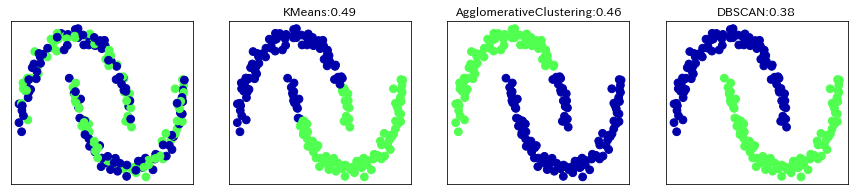

In [52]:
from sklearn.metrics.cluster import silhouette_score
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig,axes = plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)

algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]
for algorithm,ax in zip(algorithms,axes[1:]):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{}:{:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled,clusters)))
    
    
    
    
    
    
    


In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,whiten=True,random_state=0)
X_pca = pca.fit_transform(X_people)

In [66]:
dbscan = DBSCAN(min_samples=3,eps=7)
labels = dbscan.fit_predict(X_pca)
print(np.unique(labels))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


In [67]:
np.bincount(labels + 1)

array([2004,    3,   14,    7,    4,    3,    3,    4,    4,    3,    3,
          5,    3,    3])

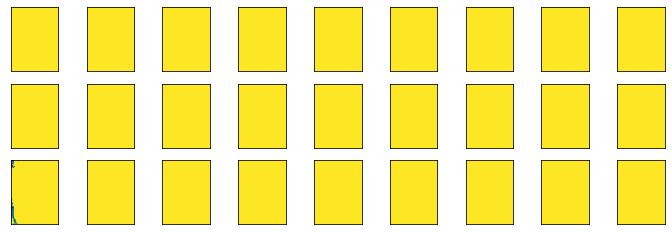

In [68]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [69]:
km = KMeans(n_clusters=10,random_state=0)
labels_km = km.fit_predict(X_pca)
np.bincount(labels_km)

array([155, 175, 238,  75, 358, 257,  91, 219, 323, 172])

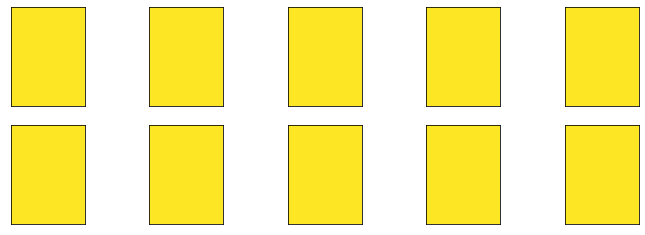

In [70]:
fig,axes = plt.subplots(2,5,subplot_kw={'xticks':(),'yticks':()},figsize=(12,4))
for center,ax in zip(km.cluster_centers_,axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),vmin=0,vmax=1)

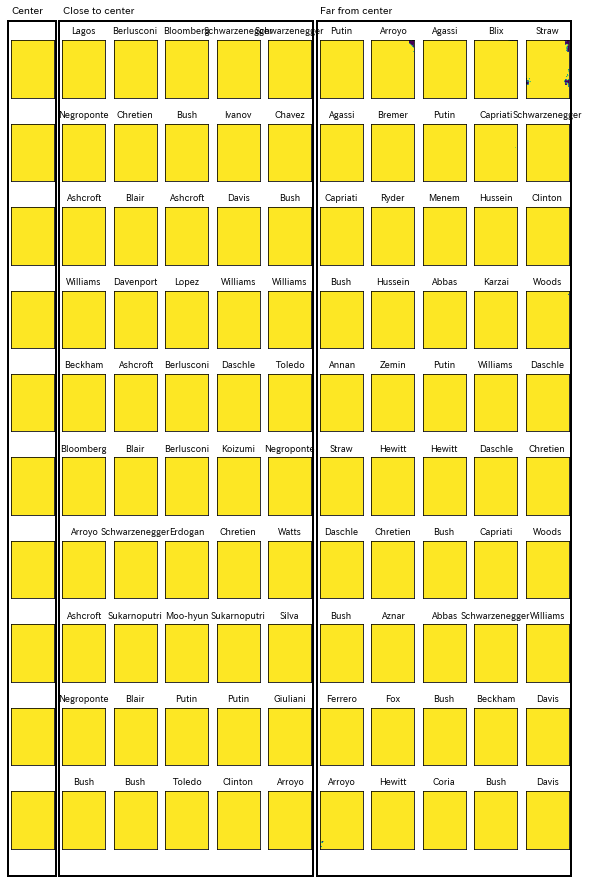

In [72]:
mglearn.plots.plot_kmeans_faces(km,pca,X_pca,X_people,y_people,people.target_names)


In [73]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
np.bincount(labels_agg)

array([169, 660, 144, 329, 217,  85,  18, 261,  31, 149])

In [74]:
adjusted_rand_score(labels_agg,labels_km)

0.08710124457309265

Text(0, 0.5, 'cluster distance')

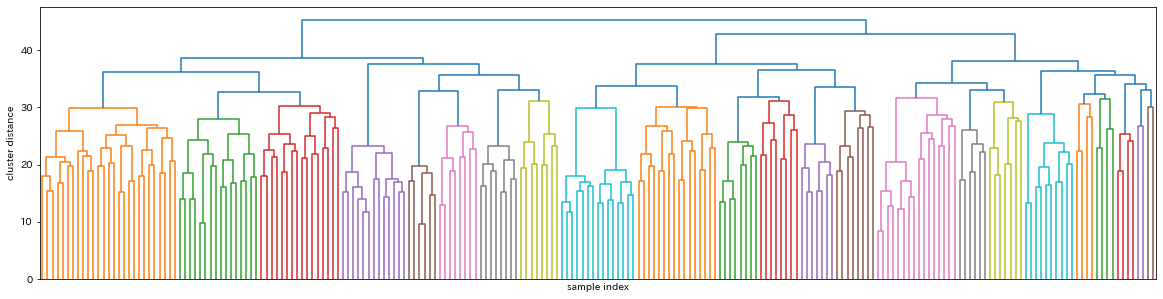

In [77]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20,5))
dendrogram(linkage_array,p=7,truncate_mode='level',no_labels=True)
plt.xlabel('sample index')
plt.ylabel('cluster distance')
           

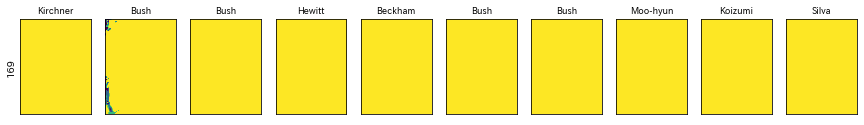

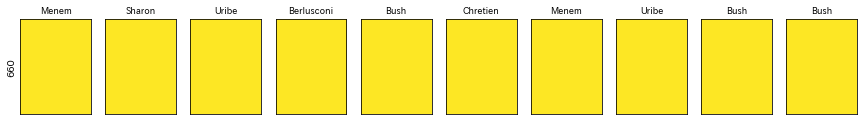

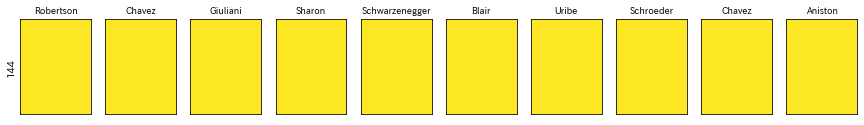

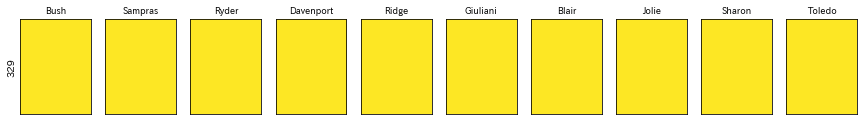

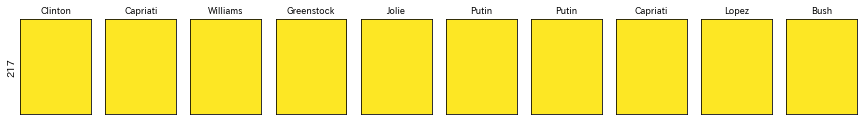

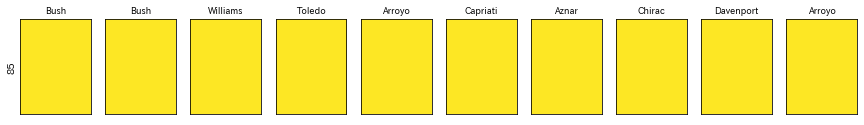

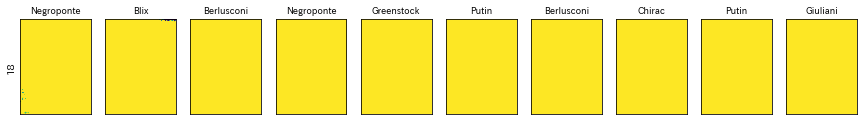

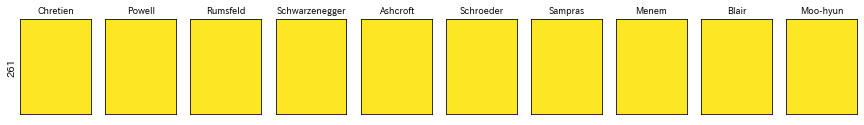

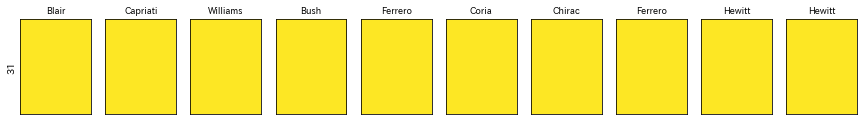

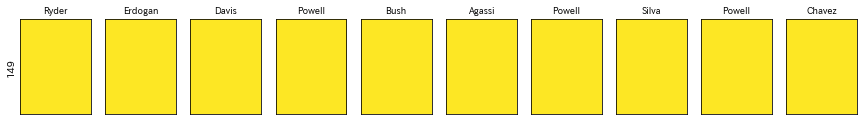

In [78]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig,axes = plt.subplots(1,10,subplot_kw={'xticks':(),'yticks':()},figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))
    for image,label,asdf,ax in zip(X_people[mask],y_people[mask],labels_agg[mask],axes):
        ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize':9})